Step 0: loss_history = -1.3287458419799805
Step 100: loss_history = -38.08705520629883
Step 200: loss_history = -83.57752227783203
Step 300: loss_history = -137.81825256347656
Step 400: loss_history = -200.8946533203125
Step 500: loss_history = -272.81884765625
Step 600: loss_history = -353.55670166015625
Step 700: loss_history = -443.0558166503906
Step 800: loss_history = -541.2606201171875
Step 900: loss_history = -620.8379516601562
Step 1000: loss_history = -632.3621215820312
Step 1100: loss_history = -633.8046264648438
Step 1200: loss_history = -634.3521728515625
Step 1300: loss_history = -638.4853515625
Step 1400: loss_history = -638.4898681640625
Step 1500: loss_history = -642.3921508789062
Step 1600: loss_history = -642.25244140625
Step 1700: loss_history = -642.449462890625
Step 1800: loss_history = -645.9066162109375
Step 1900: loss_history = -645.723388671875
Step 2000: loss_history = -649.5106811523438
Step 2100: loss_history = -649.2736206054688
Step 2200: loss_history = -6

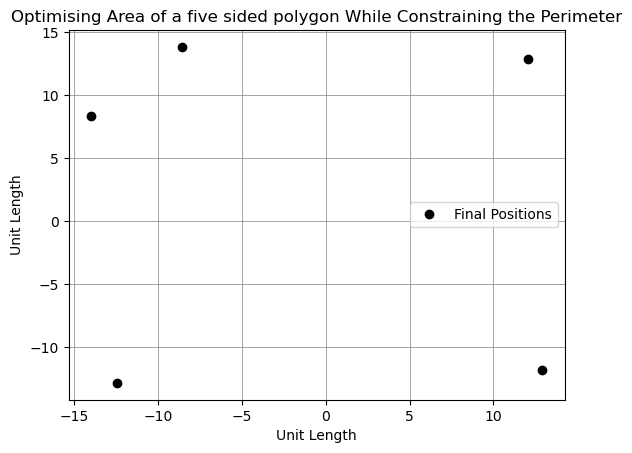

In [13]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.autograd import Variable
import numpy as np
from matplotlib.animation import FuncAnimation
import json  # Import the json library

# Initialize empty lists to hold the values
x1_list, y1_list = [], []
x2_list, y2_list = [], []
x3_list, y3_list = [], []
x4_list, y4_list = [], []
x5_list, y5_list = [], []

# Number of steps in the optimization
steps = 2500

# Initial positions (variables)
x1 = Variable(torch.randn(1) * 1, requires_grad=True)
y1 = Variable(torch.randn(1) * 1, requires_grad=True)
x2 = Variable(torch.randn(1) * 1, requires_grad=True)
y2 = Variable(torch.randn(1) * 1, requires_grad=True)
x3 = Variable(torch.randn(1) * 1, requires_grad=True)
y3 = Variable(torch.randn(1) * 1, requires_grad=True)
x4 = Variable(torch.randn(1) * 1, requires_grad=True)
y4 = Variable(torch.randn(1) * 1, requires_grad=True)
x5 = Variable(torch.randn(1) * 1, requires_grad=True)
y5 = Variable(torch.randn(1) * 1, requires_grad=True)

# Define the function to compute the area
def compute_area(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5):
    return 0.5 * torch.abs((x1 * y2 - y1 * x2) + (x2 * y3 - y2 * x3) +
                           (x3 * y4 - y3 * x4) + (x4 * y5 - y4 * x5) +
                           (x5 * y1 - y5 * x1))

# Define the function to compute the perimeter
def compute_perimeter(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5):
    s1 = torch.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    s2 = torch.sqrt((x3 - x2)**2 + (y3 - y2)**2)
    s3 = torch.sqrt((x4 - x3)**2 + (y4 - y3)**2)
    s4 = torch.sqrt((x5 - x4)**2 + (y5 - y4)**2)
    s5 = torch.sqrt((x1 - x5)**2 + (y1 - y5)**2)
    return s1 + s2 + s3 + s4 + s5

# Define the optimizer (we are using RMSprop)
optimizer = optim.RMSprop([x1, y1, x2, y2, x3, y3, x4, y4, x5, y5], lr=0.01)

# Perimeter constraint
max_perimeter = 100

# Loss history to collect the value of the loss function for each iteration
loss_history = []

# Optimization loop
for step in range(steps):
    # Compute area and perimeter
    area = compute_area(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5)
    perimeter = compute_perimeter(x1, y1, x2, y2, x3, y3, x4, y4, x5, y5)
    
    # Apply penalty if perimeter exceeds the maximum
    perimeter_penalty = torch.max(torch.tensor(0.), ((perimeter)**2 - (max_perimeter)**2))
    
    # Loss function
    loss = (-area) + perimeter_penalty**1
    
    # Zero gradients
    optimizer.zero_grad()
    
    # Compute gradients
    loss.backward()
    
    # Update parameters
    optimizer.step()

    # Append coordinates to lists
    x1_list.append(x1.item())
    y1_list.append(y1.item())
    x2_list.append(x2.item())
    y2_list.append(y2.item())
    x3_list.append(x3.item())
    y3_list.append(y3.item())
    x4_list.append(x4.item())
    y4_list.append(y4.item())
    x5_list.append(x5.item())
    y5_list.append(y5.item())

    # Append loss history
    loss_history.append(loss.item())

    if step % 100 == 0:
        print(f'Step {step}: loss_history = {loss.item()}')  # Prints a value for loss function once every hundred iterations

# Save coordinates to JSON file
coordinates = {
    "x1": x1_list,
    "y1": y1_list,
    "x2": x2_list,
    "y2": y2_list,
    "x3": x3_list,
    "y3": y3_list,
    "x4": x4_list,
    "y4": y4_list,
    "x5": x5_list,
    "y5": y5_list
}

filename = 'coordinates.json'
with open(filename, 'w') as json_file:
    json.dump(coordinates, json_file, indent=5)

print(f"Coordinates have been saved to '{filename}'")


plt.plot(x1.item(), y1.item(), 'o', color='black',label="Final Positions")
plt.plot(x2.item(), y2.item(), 'o', color='black')
plt.plot(x3.item(), y3.item(), 'o', color='black')
plt.plot(x4.item(), y4.item(),'o', color='black')
plt.plot(x5.item(), y5.item(),'o', color='black')
plt.title("Optimising Area of a five sided polygon While Constraining the Perimeter")
plt.xlabel("Unit Length")
plt.ylabel("Unit Length")
plt.legend()
plt.grid(color='gray', linestyle='-', linewidth=0.5)


point1 = [x1.item(), y1.item()]
point2 = [x2.item(), y2.item()]
point3 =[x3.item(), y3.item()]
point4 = [x4.item(), y4.item()]
point5 = [x5.item(), y5.item()]

